In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-match-deaths/erangel.jpg
/kaggle/input/pubg-match-deaths/miramar.jpg
/kaggle/input/pubg-match-deaths/deaths/kill_match_stats_final_2.csv
/kaggle/input/pubg-match-deaths/deaths/kill_match_stats_final_0.csv
/kaggle/input/pubg-match-deaths/deaths/kill_match_stats_final_1.csv
/kaggle/input/pubg-match-deaths/deaths/kill_match_stats_final_4.csv
/kaggle/input/pubg-match-deaths/deaths/kill_match_stats_final_3.csv
/kaggle/input/pubg-match-deaths/aggregate/agg_match_stats_0.csv
/kaggle/input/pubg-match-deaths/aggregate/agg_match_stats_2.csv
/kaggle/input/pubg-match-deaths/aggregate/agg_match_stats_4.csv
/kaggle/input/pubg-match-deaths/aggregate/agg_match_stats_3.csv
/kaggle/input/pubg-match-deaths/aggregate/agg_match_stats_1.csv


In [45]:
meta = pd.concat([pd.read_csv("/kaggle/input/pubg-match-deaths/aggregate/agg_match_stats_0.csv")], ignore_index=True)
df = meta[:100000]
match_duo = df.loc[df['party_size'] == 1]
match_duo.shape

(18926, 15)

In [46]:
training_duo = match_duo[['player_assists','player_dbno','player_dist_walk','player_dmg','player_kills','player_survive_time','team_placement']]
training_duo.head()

,player_assists,player_dbno,player_dist_walk,player_dmg,player_kills,player_survive_time,team_placement
494,0,0,170.954788,0,0,186.999,79
495,0,0,66.545590,0,0,124.782,87
496,0,0,610.168945,124,0,839.161,35
497,0,0,1431.292000,24,0,751.716,46
498,0,0,723.102300,100,1,744.088,47


<AxesSubplot:>

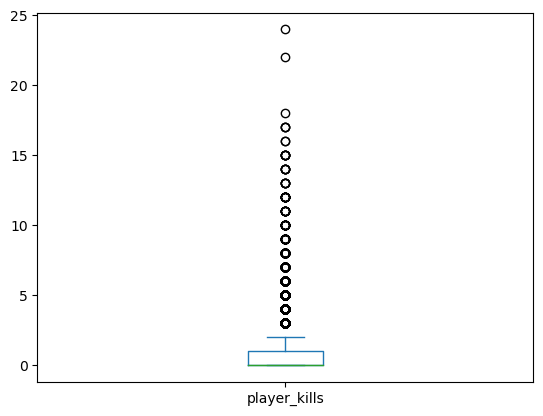

In [47]:
training_2 = match_duo[['player_kills','player_dmg']]
training_2['player_kills'].plot.box()


<AxesSubplot:>

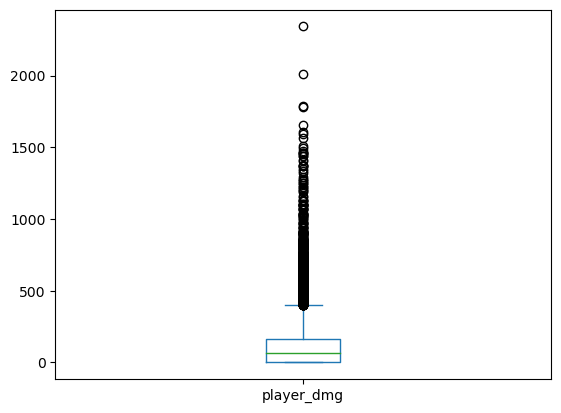

In [48]:
training_2['player_dmg'].plot.box()

In [27]:
# training_2['player_kills_num']=pd.to_numeric(training_2['player_kills'], errors='ignore')
training_2.shape

(18926, 2)

In [6]:
nc = training_2.loc[training_2['player_kills']>=5]
nc.shape

(52, 2)

In [54]:
from sklearn.preprocessing import StandardScaler

# 加载数据

# 创建StandardScaler对象，并使用fit_transform方法标准化数据
scaler = StandardScaler()
standard_training_2 = scaler.fit_transform(training_2)


In [8]:


from sklearn.svm import OneClassSVM
clf = OneClassSVM(kernel='rbf',verbose=True).fit(standard_training_2)
standard_training_2

[LibSVM]....
*
optimization finished, #iter = 4557
obj = 19399722.672972, rho = 5051.213699
nSV = 9464, nBSV = 9462


array([[-0.58677584, -0.70783668],
       [-0.58677584, -0.70783668],
       [-0.58677584,  0.07360743],
       ...,
       [ 0.06883072, -0.07763981],
       [-0.58677584, -0.49987172],
       [ 0.06883072,  0.60927477]])

In [11]:
training_3=training_2.copy()
training_3['result']=''
training_3

,player_kills,player_dmg,result
494,0,0,
495,0,0,
496,0,124,
497,0,24,
498,1,100,
...,...,...,...
99354,0,0,
99355,0,0,
99356,1,100,
99357,0,33,


In [12]:
standard_training_3=pd.DataFrame(standard_training_2, columns=training_2.columns).copy()
standard_training_3['result']=''
standard_training_3

,player_kills,player_dmg,result
0,-0.586776,-0.707837,
1,-0.586776,-0.707837,
2,-0.586776,0.073607,
3,-0.586776,-0.556589,
4,0.068831,-0.077640,
...,...,...,...
18921,-0.586776,-0.707837,
18922,-0.586776,-0.707837,
18923,0.068831,-0.077640,
18924,-0.586776,-0.499872,


In [18]:
training_3['result'] = training_3[["player_kills", "player_dmg"]].apply(
    lambda s: clf.predict(s.values[None])[0], axis=1
)
training_3



,player_kills,player_dmg,result
494,0,0,1
495,0,0,1
496,0,124,-1
497,0,24,-1
498,1,100,-1
...,...,...,...
99354,0,0,1
99355,0,0,1
99356,1,100,-1
99357,0,33,-1


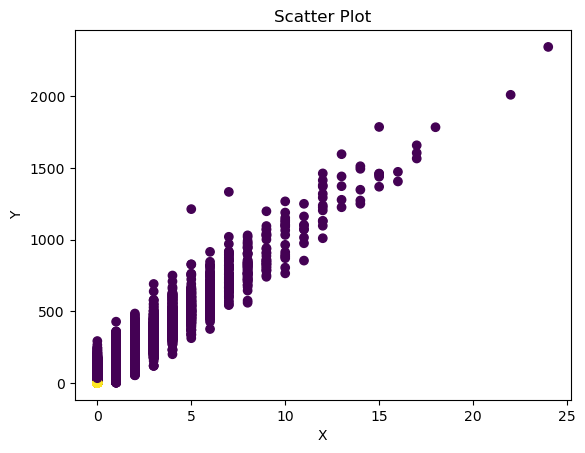

In [19]:
# Put the testing dataset and predictions in the same dataframe
import matplotlib.pyplot as plt
# Visualize the actual and predicted anomalies

# 分离出 x, y, label 列
x = training_3.iloc[:, 0]
y = training_3.iloc[:, 1]
labels = training_3.iloc[:, 2]

# 创建散点图
plt.scatter(x, y, c=labels)

# 添加标题和坐标轴标签
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')

# 显示图像
plt.show()

In [20]:
cheater = training_3.loc[training_3['result']==-1]
cheater

,player_kills,player_dmg,result
496,0,124,-1
497,0,24,-1
498,1,100,-1
500,4,438,-1
504,0,60,-1
...,...,...,...
99352,4,419,-1
99353,1,100,-1
99356,1,100,-1
99357,0,33,-1


In [13]:
standard_training_3['result'] = standard_training_3[["player_kills", "player_dmg"]].apply(
    lambda s: clf.predict(s.values[None])[0], axis=1
)
standard_training_3



,player_kills,player_dmg,result
0,-0.586776,-0.707837,-1
1,-0.586776,-0.707837,-1
2,-0.586776,0.073607,-1
3,-0.586776,-0.556589,1
4,0.068831,-0.077640,1
...,...,...,...
18921,-0.586776,-0.707837,-1
18922,-0.586776,-0.707837,-1
18923,0.068831,-0.077640,1
18924,-0.586776,-0.499872,1


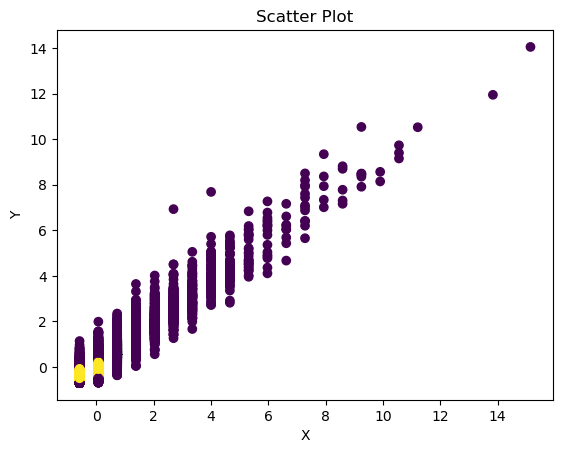

In [15]:
# Put the testing dataset and predictions in the same dataframe
import matplotlib.pyplot as plt
# Visualize the actual and predicted anomalies

# 分离出 x, y, label 列
x = standard_training_3.iloc[:, 0]
y = standard_training_3.iloc[:, 1]
labels = standard_training_3.iloc[:, 2]

# 创建散点图
plt.scatter(x, y, c=labels)

# 添加标题和坐标轴标签
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')

# 显示图像
plt.show()

In [16]:
cheater = standard_training_3.loc[standard_training_3['result']==-1]
cheater

,player_kills,player_dmg,result
0,-0.586776,-0.707837,-1
1,-0.586776,-0.707837,-1
2,-0.586776,0.073607,-1
5,-0.586776,-0.707837,-1
6,2.035650,2.052426,-1
...,...,...,...
18918,-0.586776,-0.707837,-1
18919,2.035650,1.932688,-1
18921,-0.586776,-0.707837,-1
18922,-0.586776,-0.707837,-1


In [63]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(standard_training_2)

NearestNeighbors()

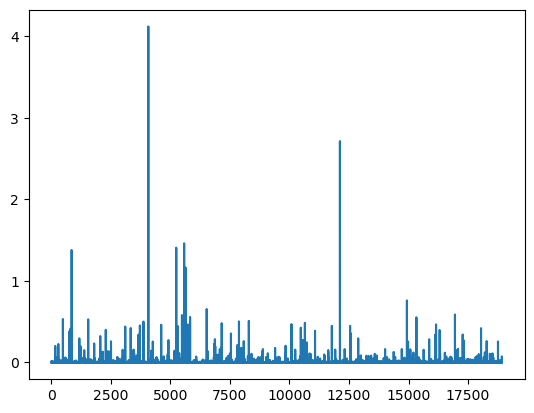

In [64]:
distances, indexes = nbrs.kneighbors(standard_training_2)

plt.plot(distances.mean(axis =1))

In [78]:
outlier_index = np.where(distances.mean(axis = 1) > 0.5)
len(outlier_index[0])

17

In [79]:
# filter outlier values
outlier_values = match_duo.iloc[outlier_index]
outlier_values.tail(13)

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
26437,2018-01-06T09:03:06+0000,94,2U4GBNA0YmmatKlQVmm0UR3tuS1IUx11KOh7zqpnyfBk-U...,tpp,1,0,0,4542.71826,2406.12744,2343,24,KouBxczG,1414.033,100048,1
35747,2017-11-21T19:13:57+0000,100,2U4GBNA0YmmpuAmNSv3vx8Chf2ZHGFT_Pk7aqpnZAjdgo_...,tpp,1,2,0,0.00000,4232.28662,1332,7,zhihuidehouge,1753.127,100077,4
36464,2017-12-02T21:19:12+0000,96,2U4GBNA0YmmQkKKrmbAirYXqEZRA8RzQbqEJPICJmqcIUh...,tpp,1,0,0,4221.50900,2857.97974,1565,17,Wcccccc1,1879.379,100030,1
36557,2017-10-26T20:25:08+0000,98,2U4GBNA0YmlhXeOIuFv---xu2uWqOG7qVBhJL2RDAiSSzf...,tpp,1,2,0,5400.09766,3078.86646,1212,5,NA-655-607-504,1656.966,100086,1
36615,2017-10-26T20:25:08+0000,98,2U4GBNA0YmlhXeOIuFv---xu2uWqOG7qVBhJL2RDAiSSzf...,tpp,1,0,0,5240.84200,2813.15400,1783,18,SytherXII,1506.521,100042,6
39091,2018-01-09T16:29:55+0000,92,2U4GBNA0Ymm_R-n03xS6mdSpV40eNsx4zLpYLECJUaYgIM...,tpp,1,1,0,0.00000,3468.03271,1197,9,RNGxiyi,1490.115,100005,13
41902,2017-11-26T08:15:09+0000,77,2U4GBNA0YmncWubkT_UdOSQHLkma6nFu6f60TFJD_9AcF0...,tpp,1,0,0,1058.82751,3271.39258,1657,17,BBBBBB888888,1876.975,100022,1
48370,2017-11-04T21:03:04+0000,97,2U4GBNA0YmmxkOZs3WvJj81nGFUCTFsW5thPPNOHYQBU_3...,tpp,1,1,0,6250.73926,3218.42432,1405,16,xiuquantaqindie,1758.218,100093,1
51006,2017-11-18T18:52:51+0000,97,2U4GBNA0YmksvQTm16_nH_hWrZVQ6c_0xbUDEnxDLw2COO...,tpp,1,0,0,0.00000,3251.81787,1249,11,QQWSAD,1949.991,100098,1
66662,2017-10-22T06:16:07+0000,87,2U4GBNA0YmnUJEVc4yu5fBpTMq5BbMHzQ2689sPKDgfpXL...,tpp,1,0,0,0.00000,5945.39000,2009,22,QUN-25-9999250,1638.477,100024,1


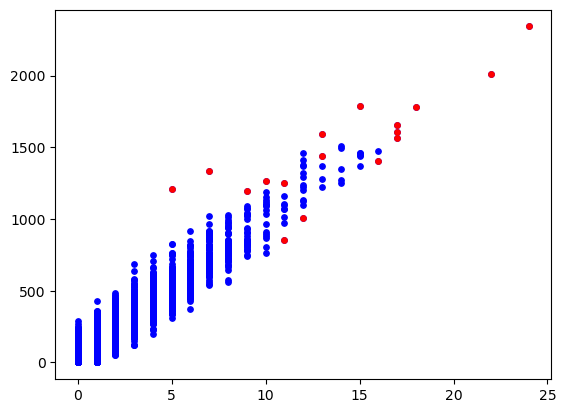

In [75]:
training_2_pd=pd.DataFrame(training_2, columns=training_2.columns).copy()
# plot data
plt.scatter(training_2_pd["player_kills"], training_2_pd["player_dmg"], color = "b", s = 15)
# plot outlier values
plt.scatter(outlier_values["player_kills"], outlier_values["player_dmg"], color = "r", s = 15)